In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB   

import nltk
import re
from nltk.corpus import stopwords
import string

Import Data

In [3]:
df=pd.read_csv("nlp-getting-started/train.csv")

Exploratory Data Analysis (EDA)

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df.shape

(7613, 5)

In [7]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
sentiment_counts = df['target'].value_counts()

Data Visualization

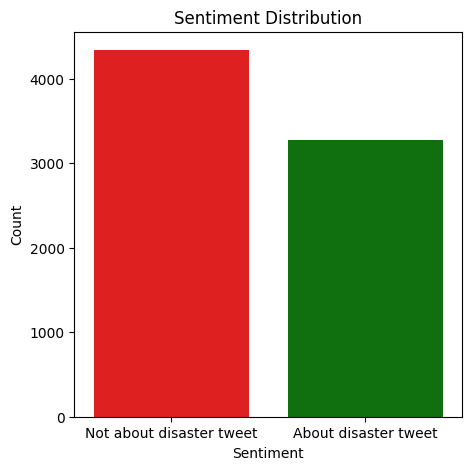

In [9]:
plt.figure(figsize=(5, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "green"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not about disaster tweet", "About disaster tweet"])
plt.title("Sentiment Distribution")
plt.show()

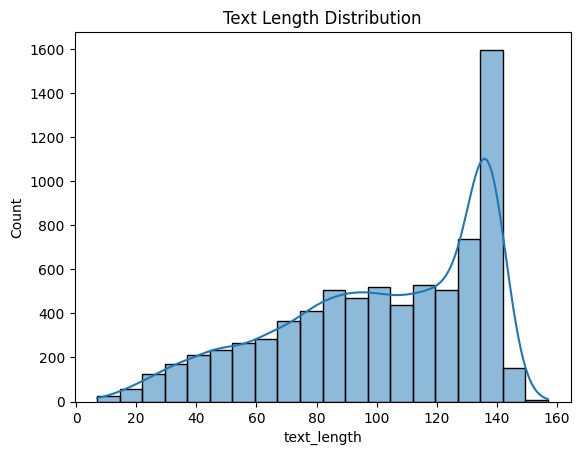

In [10]:
df['text_length'] = df['text'].apply(lambda x: len(str(x)))

sns.histplot(df['text_length'], bins=20, kde=True)
plt.title('Text Length Distribution')
plt.show()

Preprocess Data

In [11]:
stemmer=nltk.SnowballStemmer("english")
stopword=set(stopwords.words("english"))
def clean_text(df,text_column):
    # convert to lowercase
    df[text_column] = df[text_column].str.lower()
    
    # remove unwanted characters
    df[text_column] = df[text_column].str.replace('[^\w\s]', '', regex=True)
    df[text_column] = df[text_column].str.replace('\w*\d\w*', '', regex=True)
    df[text_column] = df[text_column].str.replace('\n', '', regex=True)
    df[text_column] = df[text_column].str.replace('\r', '', regex=True)
    df[text_column] = df[text_column].str.replace('https?://\S+|www\.\S+', '', regex=True)
    df[text_column] = df[text_column].str.replace('<.*?>+', '', regex=True)
    df[text_column] = df[text_column].str.replace('\[.*?\]', '', regex=True)
    
    # remove stopwords and apply stemming
    df[text_column] = df[text_column].apply(lambda x: ' '.join(
        stemmer.stem(word) 
        for word in x.split() 
        if word not in stopword
    ))
    return df[text_column]

In [12]:
df.iloc[0]["text"]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [13]:
df["cleaned_text"]=clean_text(df,"text")

In [14]:
df.iloc[0]["cleaned_text"]

'deed reason earthquak may allah forgiv us'

Word Cloud

In [15]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
def wc(data,color):
    plt.figure(figsize=(10,10))
   # mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=color,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

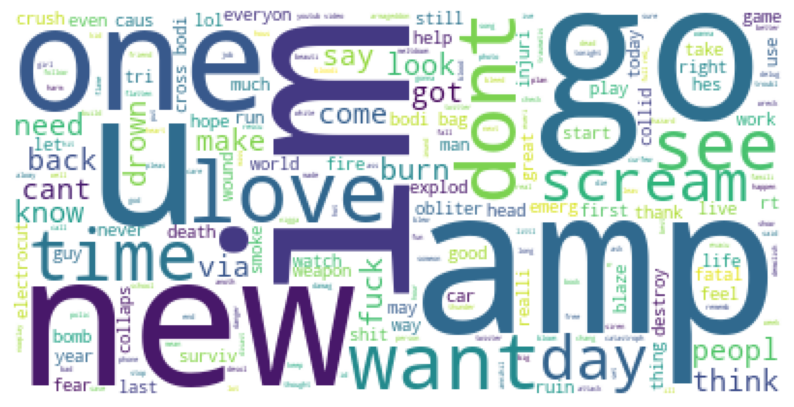

In [16]:
wc(df[df["target"]==0]["text"],"white")

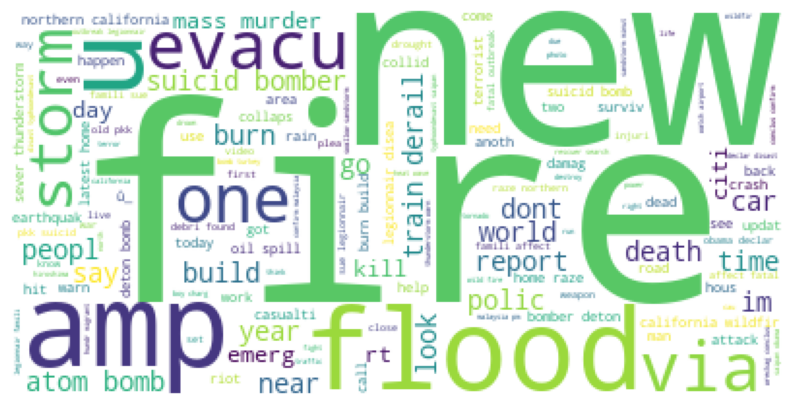

In [17]:
wc(df[df["target"]==1]["text"],"white")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

portuguese_stopwords = stopwords.words("english") 

def get_top_ngrams(texts, ngram_range=(2, 3), top_n=10):
    vect = CountVectorizer(ngram_range=ngram_range, stop_words=portuguese_stopwords) 
    dtm = vect.fit_transform(texts)
    ngram_counts = dtm.sum(axis=0)
    ngrams_freq = [(word, ngram_counts[0, idx]) for word, idx in vect.vocabulary_.items()]
    return sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]

[nltk_data] Downloading package stopwords to /Users/bela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
non_disaster_text = df[df['target'] == 0]['text']
non_disaster_text_ngrams = get_top_ngrams(non_disaster_text, ngram_range=(2, 2), top_n=20)
non_disaster_text_ngrams

[('bodi bag', 70),
 ('cross bodi', 38),
 ('look like', 36),
 ('youtub video', 36),
 ('like youtub', 35),
 ('feel like', 27),
 ('full reû_', 25),
 ('full read', 22),
 ('burn build', 22),
 ('reddit quarantin', 21),
 ('content polici', 20),
 ('emerg servic', 18),
 ('via youtub', 18),
 ('quarantin offens', 18),
 ('offens content', 18),
 ('fan armi', 17),
 ('first respond', 17),
 ('prebreak best', 17),
 ('loud bang', 17),
 ('dont know', 16)]

Most Used Word in Disaster Tweets

In [20]:
disaster_text = df[df['target'] == 0]['text']
disaster_text_ngrams = get_top_ngrams(disaster_text, ngram_range=(2, 2), top_n=20)
disaster_text_ngrams

[('bodi bag', 70),
 ('cross bodi', 38),
 ('look like', 36),
 ('youtub video', 36),
 ('like youtub', 35),
 ('feel like', 27),
 ('full reû_', 25),
 ('full read', 22),
 ('burn build', 22),
 ('reddit quarantin', 21),
 ('content polici', 20),
 ('emerg servic', 18),
 ('via youtub', 18),
 ('quarantin offens', 18),
 ('offens content', 18),
 ('fan armi', 17),
 ('first respond', 17),
 ('prebreak best', 17),
 ('loud bang', 17),
 ('dont know', 16)]

Modelling

In [23]:
def classification_test(x,y,vect,confusion_mtr=False):
    b=BernoulliNB()
    l=LogisticRegression()
    d=DecisionTreeClassifier()
    rf=RandomForestClassifier()
    h=GradientBoostingClassifier()
    a=AdaBoostClassifier()
    m=MultinomialNB()
    algos=[b,l,d,rf,h,a,b]

    algo_names=['Bernoulli NB','Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','Ada Boost Classifier','Multinomial NB']

    accuracy=[]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    result=pd.DataFrame(columns=['Accuracy Score'],index=algo_names)

    for i, algo in enumerate(algos):
        x_train_dtm = vect.fit_transform(x_train)
        x_test_dtm = vect.transform(x_test)

        if hasattr(algo, 'fit'):
            x_train_dtm = x_train_dtm  
            x_test_dtm = x_test_dtm   

        p = algo.fit(x_train_dtm, y_train).predict(x_test_dtm)
        accuracy.append(accuracy_score(y_test, p))
        if confusion_mtr:
            cm = confusion_matrix(y_test, p)
            plt.figure(figsize=(5, 5))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=algo.classes_, yticklabels=algo.classes_,cbar=None)
            plt.title(f"Confusion Matrix - {algo_names[i]}")
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()

    result['Accuracy Score']=accuracy
    r_table=result.sort_values('Accuracy Score',ascending=False)
    return r_table[['Accuracy Score']]


In [24]:
x=df["cleaned_text"]
y=df["target"]

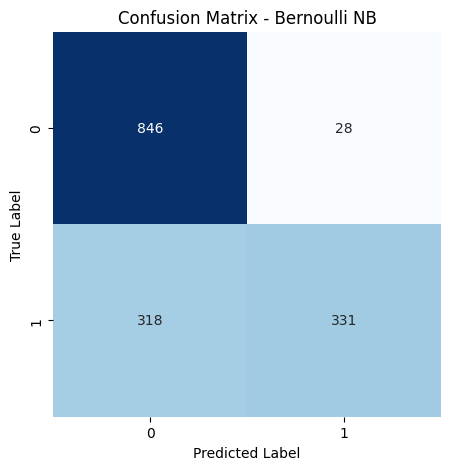

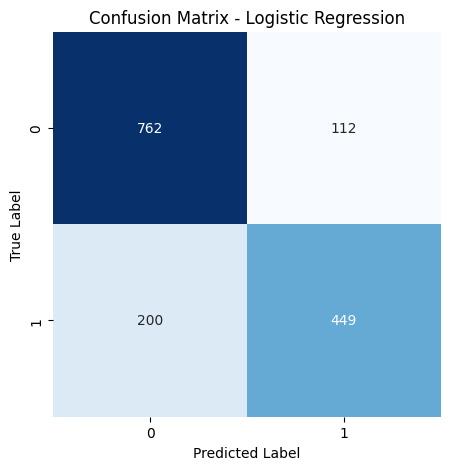

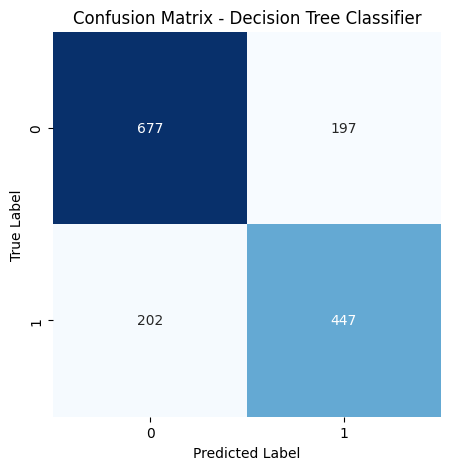

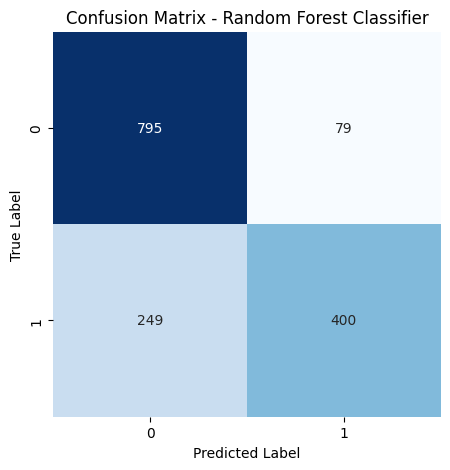

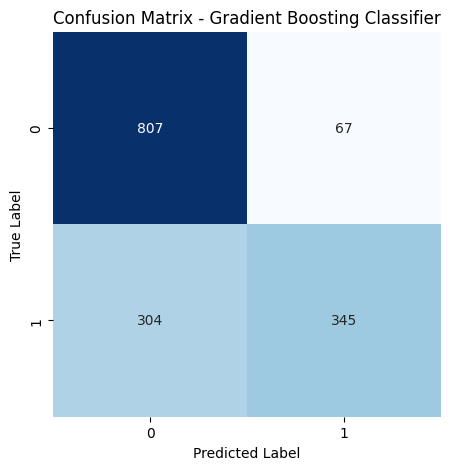

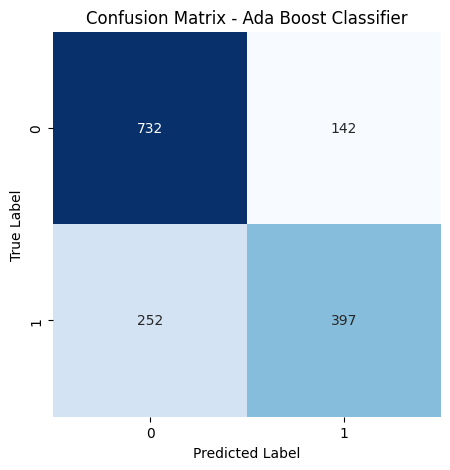

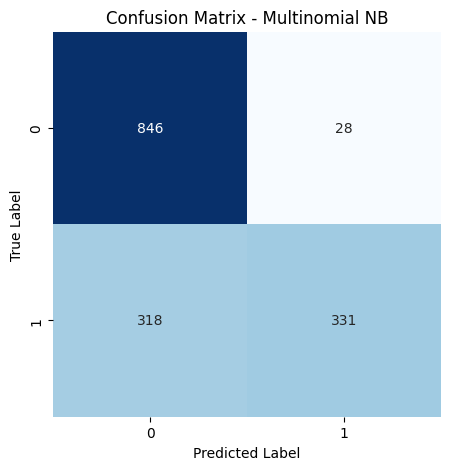

,Accuracy Score
Logistic Regression,0.795141
Random Forest Classifier,0.784636
Bernoulli NB,0.772817
Multinomial NB,0.772817
Gradient Boosting Classifier,0.756402
Ada Boost Classifier,0.741300
Decision Tree Classifier,0.738017


In [25]:
vect = CountVectorizer(ngram_range=(1,2))
classification_test(x,y,vect,confusion_mtr=True)

In [26]:
vect = CountVectorizer(ngram_range=(1,2))
l=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
model=l.fit(x_train_dtm, y_train)

In [27]:
import joblib  

joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(vect, 'vectorizer.pkl')

['vectorizer.pkl']

Testing Model

In [28]:
df_test=pd.read_csv("nlp-getting-started/test.csv")

In [29]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [30]:
df_test["cleaned_text"]=clean_text(df_test,"text")

In [31]:
test_data=vect.transform(df_test["cleaned_text"])
predictions=model.predict(test_data)

In [32]:
df_test["predictions"]=predictions

In [33]:
df_test.head()

,id,keyword,location,text,cleaned_text,predictions
0,0,NaN,NaN,happen terribl car crash,happen terribl car crash,1
1,2,NaN,NaN,heard earthquak differ citi stay safe everyon,heard earthquak differ citi stay safe everyon,1
2,3,NaN,NaN,forest fire spot pond gees flee across street ...,forest fire spot pond gees flee across street ...,1
3,9,NaN,NaN,apocalyps light spokan wildfir,apocalyps light spokan wildfir,1
4,11,NaN,NaN,typhoon soudelor kill china taiwan,typhoon soudelor kill china taiwan,1


In [34]:
submission=pd.DataFrame({
    "id":df_test["id"],
    "target":df_test["predictions"]
})

In [35]:
submission.to_csv("submission.csv",index=False)